# Kaggle
## Competition NFL Big Data Bowl

In [92]:
# Carregando os pacotes
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Statistic lib
from scipy import stats
from scipy.stats import skew, norm
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# Misc lib
import pandasql as ps

import warnings
warnings.filterwarnings('ignore')
import gc
gc.enable()

In [61]:
# Carregando os dados de treino
train = pd.read_csv('../data/train.csv')
print ("Data is ready !!")

Data is ready !!


# Data exploration

In [74]:
from IPython.display import Image
Image(url = '../images/NFL_Image_01.png')

In [62]:
# Visualizando os primeiros registros do dataset
train.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW


In [63]:
# Visualizando os tipos das features
train.dtypes

GameId                      int64
PlayId                      int64
Team                       object
X                         float64
Y                         float64
S                         float64
A                         float64
Dis                       float64
Orientation               float64
Dir                       float64
NflId                       int64
DisplayName                object
JerseyNumber                int64
Season                      int64
YardLine                    int64
Quarter                     int64
GameClock                  object
PossessionTeam             object
Down                        int64
Distance                    int64
FieldPosition              object
HomeScoreBeforePlay         int64
VisitorScoreBeforePlay      int64
NflIdRusher                 int64
OffenseFormation           object
OffensePersonnel           object
DefendersInTheBox         float64
DefensePersonnel           object
PlayDirection              object
TimeHandoff   

In [64]:
# Visualizando dados estatisticos das variaveis numericas
train.describe().T

,count,mean,std,min,25%,50%,75%,max
GameId,509762.0,2.017594e+09,4.997098e+05,2.017091e+09,2.017111e+09,2.017123e+09,2.018110e+09,2.018123e+09
PlayId,509762.0,2.017594e+13,4.997098e+09,2.017091e+13,2.017111e+13,2.017123e+13,2.018110e+13,2.018123e+13
X,509762.0,6.004030e+01,2.543526e+01,6.600000e-01,3.909000e+01,6.029000e+01,8.097000e+01,1.168400e+02
Y,509762.0,2.678354e+01,7.238206e+00,1.850000e+00,2.273000e+01,2.679000e+01,3.086000e+01,5.645000e+01
S,509762.0,2.591912e+00,1.383601e+00,0.000000e+00,1.500000e+00,2.470000e+00,3.560000e+00,9.410000e+00
A,509762.0,1.683176e+00,9.764122e-01,0.000000e+00,9.400000e-01,1.540000e+00,2.290000e+00,1.471000e+01
Dis,509762.0,2.794058e-01,1.454822e-01,0.000000e+00,1.700000e-01,2.700000e-01,3.900000e-01,1.390000e+00
Orientation,509744.0,1.802478e+02,1.042983e+02,0.000000e+00,9.063000e+01,1.797000e+02,2.704000e+02,3.600000e+02
Dir,509748.0,1.799339e+02,1.063195e+02,0.000000e+00,8.983000e+01,1.800900e+02,2.701900e+02,3.600000e+02
NflId,509762.0,2.344703e+06,6.418871e+05,2.220000e+02,2.532865e+06,2.543765e+06,2.555343e+06,2.561671e+06


In [65]:
def percent_missing(df):
    data = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(data))
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)})
    
    return dict_x

In [66]:
# Verificando as colunas com dados missing do dataset de treino
missing = percent_missing(train)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:50]

Percent of missing data


[('WindDirection', 15.74),
 ('WindSpeed', 13.23),
 ('Temperature', 9.52),
 ('GameWeather', 8.56),
 ('StadiumType', 6.46),
 ('FieldPosition', 1.26),
 ('Humidity', 1.21),
 ('OffenseFormation', 0.02),
 ('DefendersInTheBox', 0.01),
 ('GameId', 0.0),
 ('PlayId', 0.0),
 ('Team', 0.0),
 ('X', 0.0),
 ('Y', 0.0),
 ('S', 0.0),
 ('A', 0.0),
 ('Dis', 0.0),
 ('Orientation', 0.0),
 ('Dir', 0.0),
 ('NflId', 0.0),
 ('DisplayName', 0.0),
 ('JerseyNumber', 0.0),
 ('Season', 0.0),
 ('YardLine', 0.0),
 ('Quarter', 0.0),
 ('GameClock', 0.0),
 ('PossessionTeam', 0.0),
 ('Down', 0.0),
 ('Distance', 0.0),
 ('HomeScoreBeforePlay', 0.0),
 ('VisitorScoreBeforePlay', 0.0),
 ('NflIdRusher', 0.0),
 ('OffensePersonnel', 0.0),
 ('DefensePersonnel', 0.0),
 ('PlayDirection', 0.0),
 ('TimeHandoff', 0.0),
 ('TimeSnap', 0.0),
 ('Yards', 0.0),
 ('PlayerHeight', 0.0),
 ('PlayerWeight', 0.0),
 ('PlayerBirthDate', 0.0),
 ('PlayerCollegeName', 0.0),
 ('Position', 0.0),
 ('HomeTeamAbbr', 0.0),
 ('VisitorTeamAbbr', 0.0),
 ('Week

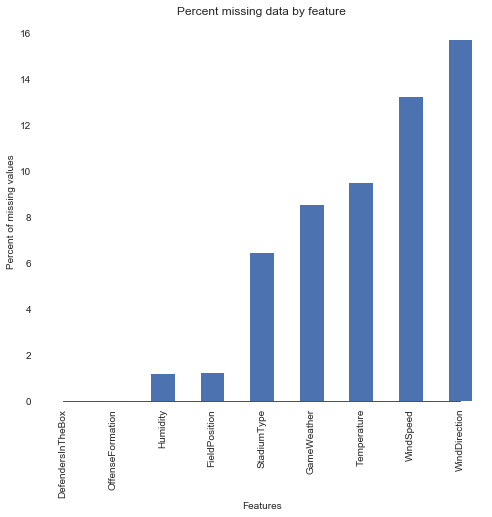

In [67]:
# Setup do plot
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
sns.set_color_codes(palette='deep')

# Identificando os valores missing
missing = round(train.isnull().mean()*100,2)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color="b")

# Visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="Percent of missing values")
ax.set(xlabel="Features")
ax.set(title="Percent missing data by feature")
sns.despine(trim=True, left=True)

## Analisando Correlacoes

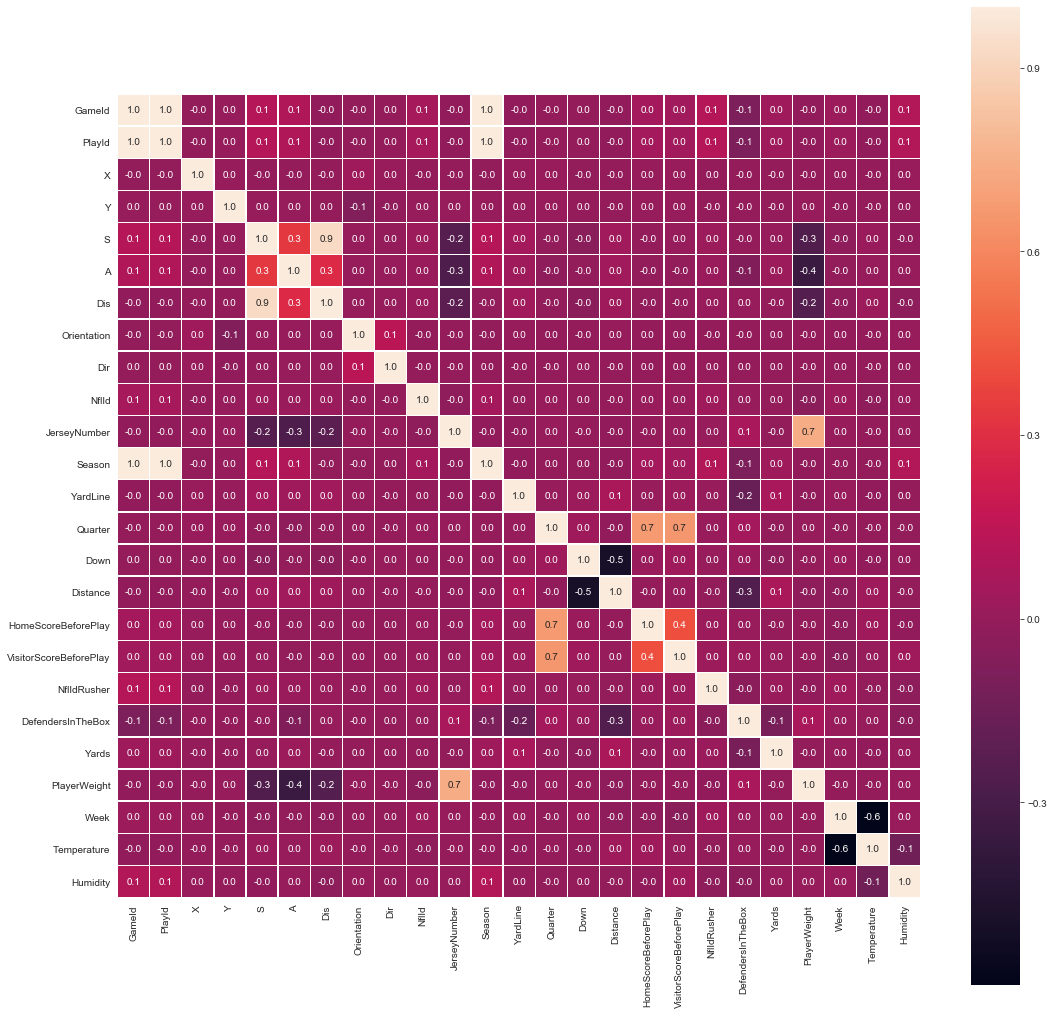

In [68]:
# Correlação de Pearson
cor_mat = train.corr(method = 'pearson')

# Visualizando o grafico de heatmap
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(cor_mat,linewidths=.5,fmt= '.1f',ax=ax,square=True,cbar=True,annot=True)

### Analisando a variavel target 'Yards'

In [69]:
# the yardage gained on the play (you are predicting this)
train['Yards'].describe()

count    509762.000000
mean          4.212334
std           6.436167
min         -14.000000
25%           1.000000
50%           3.000000
75%           6.000000
max          99.000000
Name: Yards, dtype: float64

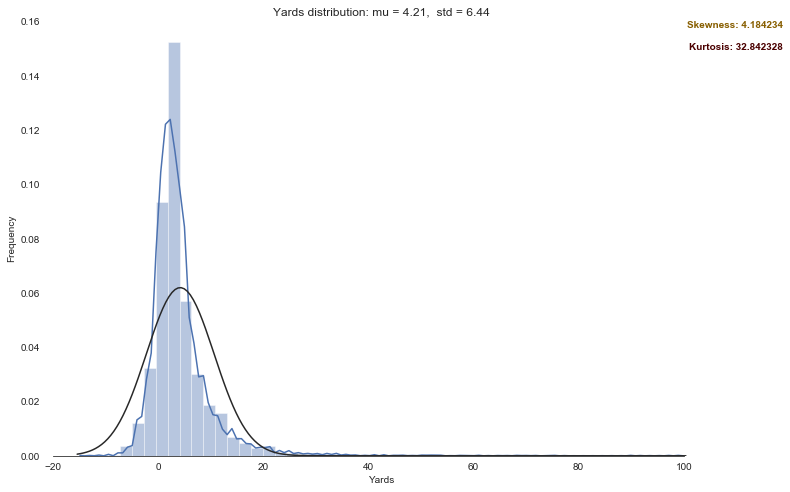

In [70]:
# Analisando a variavel target 'Yards'
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(12, 8))

# Fit a normal distribution
mu, std = norm.fit(train["Yards"])

# Verificando a distribuicao de frequencia da variavel Yards
sns.distplot(train["Yards"], color="b", fit = stats.norm)
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Yards")
ax.set(title="Yards distribution: mu = %.2f,  std = %.2f" % (mu, std))
sns.despine(trim=True, left=True)

# Adicionando Skewness e Kurtosis
ax.text(x=1.1, y=1, transform=ax.transAxes, s="Skewness: %f" % train["Yards"].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
ax.text(x=1.1, y=0.95, transform=ax.transAxes, s="Kurtosis: %f" % train["Yards"].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')

plt.show()

### Analisando as variaveis gerais do JOGO

In [71]:
# year of the season
train['Season'].value_counts()

2017    261800
2018    247962
Name: Season, dtype: int64

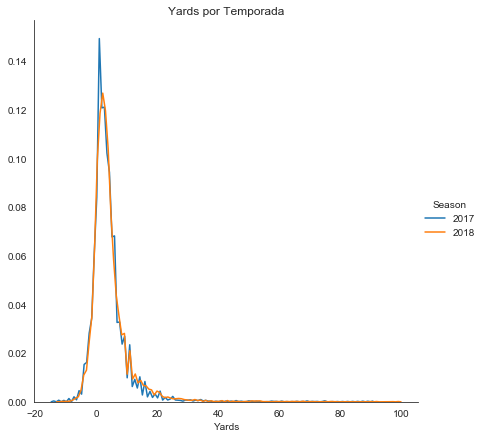

In [75]:
# Verificando a relacao da variavel YARDS com a Temporada
# Aparentemente 2017 e 2018 tem uma mesma distribuicao de Yards
# Uma pequena variacao em 2018 nos picos
sns.FacetGrid(train, hue="Season", height=6) \
   .map(sns.kdeplot, "Yards") \
   .add_legend()
plt.title('Yards por Temporada')

In [152]:
# Realizando uma transformacao logaritma na variavel Yards
train["Yards_log"] = np.log1p(train["Yards"])

Text(0.5, 1, 'Yards por Temporada')

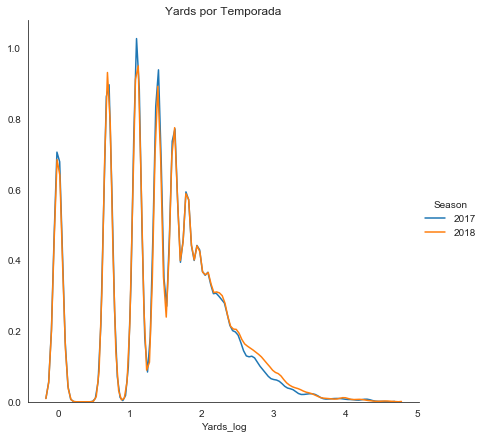

In [153]:
# Verificando a relacao da variavel YARDS (na base logaritima) com a Temporada
# Desta forma conseguimos visualizar uma distribuicao bem parecida de Yards entre as temporadas
sns.FacetGrid(train, hue="Season", height=6) \
   .map(sns.kdeplot, "Yards_log") \
   .add_legend()
plt.title('Yards por Temporada')

In [144]:
# Season tem uma correlação de 1.0 com GameId e PlayId. Exemplo abaixo com 2017 e 2018, mostra que:
# GameId e PlayId contem o ano e mais algumas informacoes
# Parece ser o mes e o dia e mais um identificador
tmp = train.set_index('Season')
print(tmp.loc[[2017], ['GameId','PlayId']].head(1))
print(tmp.loc[[2018], ['GameId','PlayId']].head(1))

            GameId          PlayId
Season                            
2017    2017090700  20170907000118
            GameId          PlayId
Season                            
2018    2018090600  20180906000104


In [78]:
# description of the stadium environment
train['StadiumType'].value_counts()

Outdoor                   267696
Outdoors                   67474
Indoors                    40854
Dome                       17336
Indoor                     16148
Retractable Roof           15884
Open                        9614
Retr. Roof-Closed           7172
Retr. Roof - Closed         6446
Domed, closed               5918
Domed, open                 2684
Closed Dome                 2134
Dome, closed                1826
Domed                       1826
Oudoor                      1188
Indoor, Roof Closed         1056
Retr. Roof Closed           1056
Retr. Roof-Open              990
Outddors                     968
Bowl                         968
Heinz Field                  902
Outdoor Retr Roof-Open       880
Retr. Roof - Open            880
Outdor                       858
Indoor, Open Roof            858
Ourdoor                      858
Outside                      814
Cloudy                       770
Domed, Open                  770
Name: StadiumType, dtype: int64

In [79]:
# stadium where the game is being played
train['Stadium'].value_counts()

MetLife Stadium                        21054
Levis Stadium                          17402
Gillette Stadium                       17248
New Era Field                          17204
Lucas Oil Stadium                      16544
U.S. Bank Stadium                      16170
AT&T Stadium                           15950
Nissan Stadium                         15862
Mercedes-Benz Superdome                15554
Paul Brown Stadium                     15444
FedExField                             15356
Arrowhead Stadium                      15334
Soldier Field                          15334
Ford Field                             15246
Heinz Field                            14850
Raymond James Stadium                  14696
StubHub Center                         14630
CenturyLink Field                      14586
Hard Rock Stadium                      14564
Lincoln Financial Field                14476
Mercedes-Benz Stadium                  14388
Lambeau Field                          14300
Bank of Am

In [80]:
# city where the game is being player
train['Location'].value_counts()

East Rutherford, NJ          30096
Santa Clara, CA              17402
Indianapolis, Ind.           16544
Denver, CO                   16478
Glendale, AZ                 16434
Minneapolis, MN              16170
Baltimore, Md.               16016
Nashville, TN                15862
Orchard Park NY              15488
Landover, MD                 15356
Green Bay, WI                15312
Atlanta, GA                  15246
Arlington, Texas             15246
Foxborough, MA               15224
Tampa, FL                    14696
Carson, CA                   14630
Seattle, WA                  14630
Oakland, CA                  14564
Chicago, IL                  14498
Cincinnati, Ohio             14476
Kansas City, MO              14190
Los Angeles, Calif.          13706
Miami Gardens, Fla.          13486
Pittsburgh                   13178
Philadelphia, Pa.            13156
Jacksonville, FL             11352
New Orleans, LA              11110
Detroit                      10670
Houston, TX         

In [81]:
# description of the field surface
train['Turf'].value_counts()

Grass                     166276
Natural Grass             107096
Field Turf                 47674
Artificial                 44484
FieldTurf                  33198
UBU Speed Series-S5-M      32890
A-Turf Titan               17204
UBU Sports Speed S5-M       8558
FieldTurf360                8272
DD GrassMaster              8074
Twenty-Four/Seven Turf      8030
SISGrass                    7238
FieldTurf 360               6974
Natural grass               4796
Artifical                   3894
Natural                     1628
Field turf                   990
Naturall Grass               858
natural grass                814
grass                        814
Name: Turf, dtype: int64

In [82]:
# a unique game identifier
train['GameId'].value_counts()

2017121000    1870
2017101501    1628
2017100108    1452
2017092100    1386
2017091002    1386
2017110504    1386
2018111807    1386
2018100700    1342
2018123014    1342
2018090901    1342
2018111106    1320
2017121400    1298
2018122308    1276
2017091005    1254
2017100809    1254
2018102500    1254
2018092000    1254
2018100711    1254
2018120207    1254
2017100101    1232
2017123103    1232
2018123015    1232
2017100900    1232
2017100102    1232
2017091711    1232
2018090905    1232
2018093008    1232
2017123107    1232
2018102808    1210
2017100807    1210
              ... 
2018112200     770
2018112509     748
2018102900     748
2018093012     748
2018090910     748
2017091003     726
2017091008     726
2017111600     726
2018093007     726
2018101401     726
2018123009     704
2018120209     704
2018092307     704
2018123003     704
2018091613     704
2018102801     704
2018122310     704
2018111900     682
2018122309     682
2018122313     682
2018091605     682
2018102800  

In [83]:
# a unique play identifier
train['PlayId'].value_counts()

20181007011551    22
20181007090207    22
20171112053416    22
20170918003383    22
20181230140128    22
20170910022384    22
20171001120063    22
20181202132252    22
20171112090950    22
20171002002752    22
20170917041501    22
20170917051736    22
20181213001041    22
20180923012541    22
20181111021012    22
20180930094139    22
20181028023394    22
20171231153278    22
20181007023216    22
20180910011465    22
20170928000166    22
20181008001618    22
20171001102903    22
20181209030691    22
20181014100976    22
20181104072724    22
20181028040809    22
20180923113547    22
20171231100999    22
20181118081196    22
                  ..
20181230152720    22
20180923020355    22
20171210081365    22
20181028052206    22
20181125061862    22
20171203020589    22
20181209081633    22
20171210013306    22
20181129003645    22
20171105092117    22
20181104003980    22
20171106003160    22
20171105020728    22
20180916022072    22
20171126000436    22
20181230144276    22
2017091010237

In [84]:
# home or away
train['Team'].value_counts()

away    254881
home    254881
Name: Team, dtype: int64

### Analisando as variaveis do JOGO

In [ ]:
# game quarter (1-5, 5 == overtime)
train['Quarter'].value_counts()

In [ ]:
# time on the game clock
train['GameClock'].value_counts()

In [ ]:
# home team abbreviation 
train['HomeTeamAbbr'].value_counts()

In [ ]:
# home team score before play started
train['HomeScoreBeforePlay'].value_counts()

In [ ]:
# visitor team abbreviation
train['VisitorTeamAbbr'].value_counts()

In [ ]:
# visitor team score before play started
train['VisitorScoreBeforePlay'].value_counts()

In [ ]:
# team with possession
train['PossessionTeam'].value_counts()

In [ ]:
# which side of the field the play is happening on
train['FieldPosition'].value_counts()

### Analisando as variaveis de ACOES no JOGO

In [ ]:
# offensive team positional grouping
train['OffensePersonnel'].value_counts()

In [ ]:
# defensive team positional grouping
train['DefensePersonnel'].value_counts()

In [ ]:
# direction the play is headed
train['PlayDirection'].value_counts()

In [ ]:
# offense formation
train['OffenseFormation'].value_counts()

In [ ]:
# number of defenders lined up near the line of scrimmage, spanning the width of the offensive line
train['DefendersInTheBox'].value_counts()

In [ ]:
# UTC time of the handoff
train['TimeHandoff'].value_counts()

In [ ]:
# UTC time of the snap
train['TimeSnap'].value_counts()

### Analisando as variaveis de TEMPERATURA

In [ ]:
# wind direction
train['WindDirection'].value_counts()

In [ ]:
# wind speed in miles/hour
train['WindSpeed'].value_counts()

In [ ]:
# temperature (deg F)
train['Temperature'].value_counts()

In [ ]:
# description of the game weather
train['GameWeather'].value_counts()

In [ ]:
# humidity
train['Humidity'].value_counts()

### Analisando as variaveis do JOGADOR

In [ ]:
# a unique identifier of the player
train['NflId'].value_counts()

In [ ]:
# the NflId of the rushing player
train['NflIdRusher'].value_counts()

In [ ]:
# player's name
train['DisplayName'].value_counts()

In [ ]:
# player height (ft-in)
train['PlayerHeight'].value_counts()

In [ ]:
# player weight (lbs)
train['PlayerWeight'].value_counts()

In [ ]:
# birth date (mm/dd/yyyy)
train['PlayerBirthDate'].value_counts()

In [ ]:
# where the player attended college
train['PlayerCollegeName'].value_counts()

### Analisando as variaveis de POSICIONAMENTO DO JOGADOR

In [ ]:
# player position along the long axis of the field. See figure below.
train['X'].value_counts()

In [ ]:
# player position along the short axis of the field. See figure below.
train['Y'].value_counts()

In [ ]:
# speed in yards/second
train['S'].value_counts()

In [ ]:
# acceleration in yards/second^2
train['A'].value_counts()

In [ ]:
# distance traveled from prior time point, in yards
train['Dis'].value_counts()

In [ ]:
# orientation of player (deg)
train['Orientation'].value_counts()

In [ ]:
# angle of player motion (deg)
train['Dir'].value_counts()

In [ ]:
# the yard line of the line of scrimmage
train['YardLine'].value_counts()

### Analisando as variaveis DESCONHECIDAS

In [ ]:
# jersey number
train['JerseyNumber'].value_counts()

In [ ]:
# the down (1-4)
train['Down'].value_counts()

In [ ]:
# yards needed for a first down
train['Distance'].value_counts()

In [ ]:
train['Position'].value_counts()